In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
from glob import glob
import time
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
data_type = 'Barge_in'
directory = '/home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/'
parent_path = directory  + data_type + '_*.txt'

In [3]:
states = []
seq_lengths = []
files = glob(parent_path)
files.sort(key=lambda x: int(x.split('/')[-1].split('.')[-2].split('_')[-1]))
for path in files:
    # print(path)
    if 'obstacles' in path:
        continue
    print('preprocessing %s' % path)
    with open(path, 'r') as file:
        cur_states = []
        for i, line in enumerate(file):
            # print('line')
            # print(line)
            
            data = line.split()
            # print('data')
            # print(data)
            
            if i == 0:
                # print('first data')
                # print(data)
                continue
                # the first line contains only the headers
            state = []
            
            for j, data in enumerate(line.split()):
                # print ('data is %s' % data )
                if j == 0:
                    continue
                    # we dont care about the timestamp
                    
                elif '(' in data:
                    x, y = data.lstrip('(').rstrip(')').split(',')
                    state.extend([float(x), float(y)])
                else:
                    state.append(float(data))
                # the way extend and append is being used here, everything gets added serially 
                # [ a, f, v, vf, vfv ...]
            cur_states.append(state)
            # print(len(state)) = 14 constantly
            # print('state')
            # print(state)
            # print('len(cur_states)')
            # print(len(cur_states))
            # print(cur_states)
        seq_lengths.append(len(cur_states))
        # this is append the total num of lines that were present in the data file
        # print('seq_lengths')
        # print(seq_lengths)
        states.append(cur_states)
        # print(len(states))

preprocessing /home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/Barge_in_50.txt
preprocessing /home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/Barge_in_51.txt
preprocessing /home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/Barge_in_52.txt
preprocessing /home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/Barge_in_53.txt
preprocessing /home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/Barge_in_54.txt
preprocessing /home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/Barge_in_55.txt
preprocessing /home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/Barge_in_56.txt
preprocessing /home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/Barge_in_57.txt
preprocessing /home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/Barge_in_58.txt
preprocessing /home/patricknaughton01/Downloads/LearnControllers/RVO2/examples/data/Barge_in_59.txt


In [4]:
n = len(seq_lengths) #will store the number of files 
# print(n)
seq_lengths = np.array(seq_lengths)
num_humans = np.zeros((n, ))
states_array = np.empty((n, ), dtype=object)
for i, state in enumerate(states):
    states_array[i] = np.array(state)
    # gets the same value that was previously held by cur_states
    # i think this can be done by assigning cur_states also instead of putting 
    # this in a diff loop
    # print(states_array[i])
    # print('\n')
    # print(len(state[0]))
    num_humans[i] = (len(state[0]) - 4) / 5
    # print(num_humans[i])

In [5]:
save_path = '/home/patricknaughton01/Downloads/LearnControllers/learn_general_controller/data/simulate_' + data_type.lower()
if not os.path.exists(save_path):
    os.makedirs(save_path)
print('save path is: %s' % save_path)

save path is: /home/patricknaughton01/Downloads/LearnControllers/learn_general_controller/data/simulate_barge_in


In [6]:
# obstacle_files = glob(directory  + data_type + "_obstacles_*.txt")
# obstacle_files.sort(key=lambda x: int(x.split('/')[-1].split('.')[-2].split('_')[-1]))

filt = seq_lengths < 100
# print(filt)
# print(seq_lengths)
seq_lengths = seq_lengths[filt]
# print(seq_lengths[filt])
# print(num_humans)
num_humans = num_humans[filt]
# print(num_humans[filt])
states_array = states_array[filt]
print(states_array)
# print(states_array)
# n = states_array.shape[0]
# filt = np.empty((n, ), dtype=bool)
# filt.fill(True)


# hist = [100, 100, 100, 100, 100, 100]
# for i in range(n):
#     if np.mean(np.abs(states_array[i][2:, 8] - states_array[i][1, 8])) >= 0.3:
#         filt[i] = False
#         hist[i//100] -= 1

# seq_lengths = seq_lengths[filt]
# num_humans = num_humans[filt]
# states_array = states_array[filt]

# for i in range(np.where(filt==False)[0])
#     os.remove(directory  + data_type + "_obstacles_%d.txt" % i)

[array([[1.19719 , 1.15206 , 0.      , ..., 0.      , 0.      , 0.3     ],
       [1.44718 , 1.15204 , 0.999953, ..., 0.      , 0.      , 0.3     ],
       [1.50282 , 1.15817 , 0.222566, ..., 0.      , 0.      , 0.3     ],
       ...,
       [4.93198 , 1.23871 , 0.996614, ..., 0.      , 0.      , 0.3     ],
       [5.18114 , 1.21812 , 0.996616, ..., 0.      , 0.      , 0.3     ],
       [5.38092 , 1.2016  , 0.799151, ..., 0.      , 0.      , 0.3     ]])
 array([[1.32942  , 1.0183   , 0.       , ..., 0.       , 0.       ,
        0.3      ],
       [1.34253  , 1.02095  , 0.0524747, ..., 0.       , 0.       ,
        0.3      ],
       [1.37594  , 0.995905 , 0.133626 , ..., 0.       , 0.       ,
        0.3      ],
       ...,
       [5.031    , 0.815201 , 0.942384 , ..., 0.       , 0.       ,
        0.3      ],
       [5.26661  , 0.898806 , 0.942422 , ..., 0.       , 0.       ,
        0.3      ],
       [5.44502  , 0.962121 , 0.713655 , ..., 0.       , 0.       ,
        0.3      ]])


In [16]:
np.save(save_path + '/seq_lengths.npy', seq_lengths)
# print(seq_lengths)
np.save(save_path + '/states.npy', states_array)
# print(states_array)
np.save(save_path + '/num_humans.npy', num_humans)
# print(num_humans)


In [17]:
seq_lengths = np.load(save_path + '/seq_lengths.npy',allow_pickle=True)
states_array = np.load(save_path + '/states.npy',allow_pickle=True)
num_humans = np.load(save_path + '/num_humans.npy',allow_pickle=True)

7
[array([0.78902014, 0.08996666, 0.55117253]), array([0.34018008, 0.13402998, 0.24950176]), array([0.1898181 , 0.41762133, 0.34886065]), array([0.25682625, 0.96430988, 0.37715503]), array([0.32892001, 0.68669735, 0.24574822]), array([0.15492214, 0.87865082, 0.58224452]), array([0.41570335, 0.52167985, 0.72035387])]


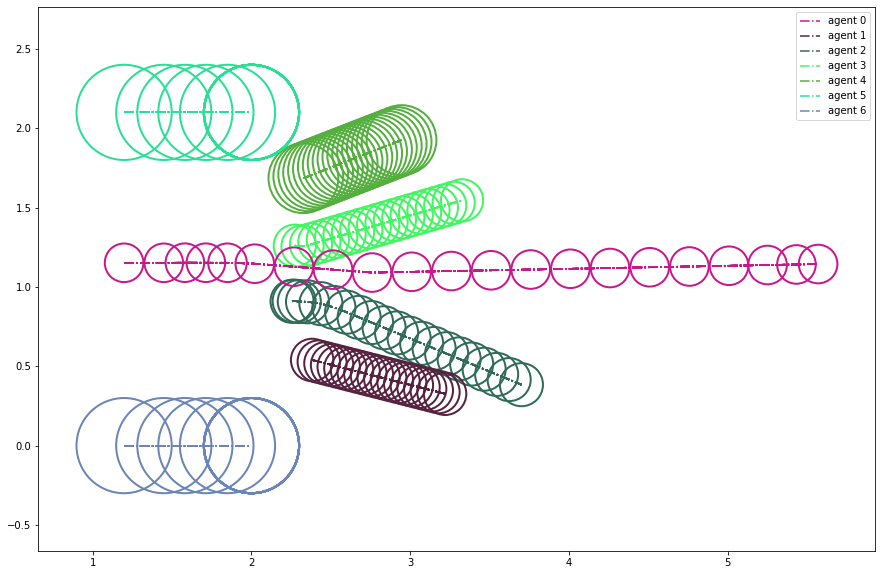

In [18]:
# visualization of the data 
idx = 0

episode = states_array[idx]
n = int((episode.shape[1] - 4) / 5)
print(n)
colors = [np.random.rand(3) for _ in range(n)]
print(colors)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.axis('equal')
T = episode.shape[0]
# plt.hold(True)

# ## check if obstacle exists
# obstacle_files = glob(directory  + data_type + "_obstacles_*.txt")
# obstacle_path = directory  + data_type + "_obstacles_%d.txt" % idx
# if obstacle_path in obstacle_files:
#     obstacles = np.loadtxt(obstacle_path)
#     num_vertices = int(obstacles.shape[1] / 2)
#     num_obstacles = obstacles.shape[0]
#     for j in range(num_obstacles):
#         for k in range(num_vertices):
#             plt.plot(obstacles[j, [k * 2, (k * 2 + 2) % obstacles.shape[1]]], 
#                      obstacles[j, [1 + 2 * k, (3 + 2 * k) % obstacles.shape[1]]], 'k-')
    
for t in range(T):
    for i in range(n):
        if i == 0:
            x_idx, y_idx = 0, 1
            radius = episode[0, 4]
        else:
            x_idx, y_idx = 9 + (i-1) * 5, 9 + (i-1) * 5 + 1
            radius = episode[0, 13 + (i-1) * 5]
#         print('radius is %.4f' % radius)
        plt.plot(episode[:, x_idx], episode[:, y_idx], '-.', color=colors[i])  
    
        e = patches.Ellipse((episode[t, x_idx], episode[t, y_idx]), radius * 2, radius * 2, linewidth=2, fill=False, zorder=2, color=colors[i])
        ax.add_patch(e)        


legends = ['agent %d' % i for i in range(n)]
# max_lim = np.max(episode)
# min_lim = np.min(episode)
# plt.xlim((min_lim, max_lim))
# plt.ylim((min_lim, max_lim))
plt.legend(legends)
plt.show()